In [2]:
#텐서를 만드는 과정
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)#인공지능 종류? supervios learning? 1주차 pdf 확인해보기
print(test_images.shape)#shape 를 통해서 구조를 알 수 있음.

(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(train_images.ndim, train_images.dtype)
print(train_labels.ndim, train_labels.dtype)
print(test_images.ndim, test_images.dtype)
print(test_labels.ndim, test_labels.dtype)#unsigned integer 8 bit

3 uint8
1 uint8
3 uint8
1 uint8


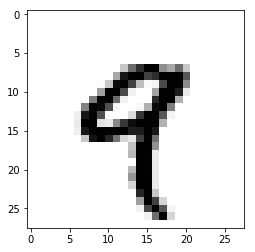

In [4]:
import matplotlib.pyplot as plt

digit = train_images[4]#5번째 영상을 digit에 불러온 것.

plt.imshow(digit, cmap=plt.cm.binary)#color map. 
plt.show()

In [5]:
#네트워크의 뼈대 만들기 세팅을 해 주는것.
from keras import models #keras 에 있는 models 와 layers 가져오기
from keras import layers

network = models.Sequential() #sequential = 차례대로 배열 하는 것 레이어를 한층한층 차례대로 쌓는거임
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))#784의 input이 512개에 연결되는 것.
#network.add(layers.Dense(128, activation='relu', input_shape=(512,)))
#network.add(layers.Dense(64, activation='relu', input_shape=(128,)))
network.add(layers.Dense(10, activation='softmax'))#최종적으로 10으로 출력
#전략 설정
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])#훈련을 시킬때 어떤 식으로 찾아가게 할건지. accuracy는 얼마나 잘 마쳤느냐.

In [0]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28 * 28))#28,28을 28*28=784인 2차원 텐서로 바꿈.
train_images = train_images.astype('float32') / 255#normarize. 영상에서 제일 높은값이 255이고, 이를 1로 하기 위해서 즉, 0~1 사이의 값으로 바꾸기 위하여.

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)#10개중에 정답이 무엇인지 알려주는 과정 숫자를 0100000000 이런식으로 변형시키는 것.
test_labels = to_categorical(test_labels)

In [7]:
#러닝 시작
network.fit(train_images, train_labels, epochs=15, batch_size=128)#ephch = 몇번 반복 할 건지. 너무 많이 하면 좋지 않음.
#batch_size = 6만개의 데이터를 쪼개서 나눠서 씀. 한번 진행 할때마다 w를 임의로 설정하여 오차를 계산하고 오차가 줄어들도록 w를 수정하고,,
#6만개를 쪼개서 어느정도 하고 다른 또 다른 데이터로 진행하고..
#6만장을 한번에 하지 않고? 한번에 들어갈 데이터의 양을 총 6만장에서 128개의 데이터로 떼놓음

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.2540 - acc: 0.9268
Epoch 2/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.1025 - acc: 0.9697
Epoch 3/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0674 - acc: 0.9795
Epoch 4/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0486 - acc: 0.9857
Epoch 5/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0372 - acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0285 - acc: 0.9908
Epoch 7/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0220 - acc: 0.9934
Epoch 8/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.0166 - acc: 0.9955
Epoch 9/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.0133 - acc: 0.9962
Epoch

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)#총 데이터 중에 얼마정도 맞췄는지 나타냄

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.9827


In [9]:
print(train_images.ndim)
print(train_images.dtype)
digit=train_images[4]
digit=digit.reshape(28,28)
print(digit.shape)

2
float32
(28, 28)


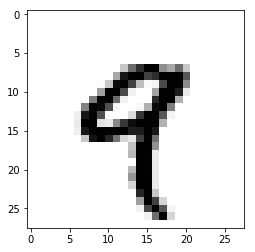

In [10]:
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

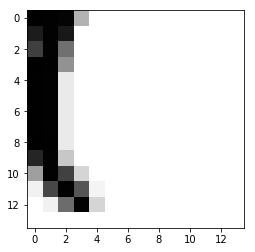

In [11]:
my_slice=digit[14:,14:]
plt.imshow(my_slice,cmap=plt.cm.binary)
plt.show()

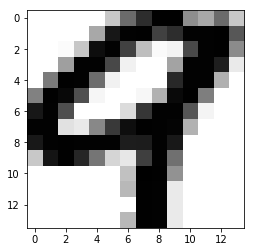

In [12]:
my_slice=digit[7:-7,7:-7]
plt.imshow(my_slice,cmap=plt.cm.binary)
plt.show()

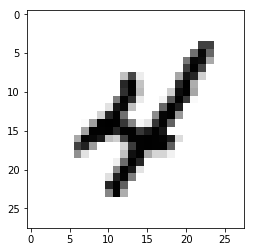

In [13]:
train_images=train_images.reshape(60000, 28 , 28)
my_slice=train_images[9]
plt.imshow(my_slice,cmap=plt.cm.binary)
plt.show()